In [1]:
import pandas as pd
import os
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import powerlaw a
from scipy import stats

In [2]:
directory = '/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/SCoins/TokenizedFiat'


In [3]:
combined_data_Token = pd.DataFrame()

In [4]:
#changing data structure for better readability
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        stock_name = filename[:-4]  # Extract stock name from the file name

        # Read the CSV file and append the stock name as a new column
        df = pd.read_csv(file_path)
        df['Stock'] = stock_name

        # Append the data to the combined DataFrame
        combined_data_Token = combined_data_Token.append(df, ignore_index=True)

In [ ]:
#combined_data_Gold=combined_data
#combined_data_Gold = pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/SCoins/combined_data_Gold.csv')
combined_data_Token.to_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/SCoins/combined_data_Token.csv', index=False)

In [5]:
#adding realized daily returns function
def calculate_daily_return(group):
    group['Realized Vol'] = np.sqrt(365) * np.sqrt(np.log(group['High']/group['Close']) * np.log(group['High']/group['Open']) + np.log(group['Low']/group['Close']) * np.log(group['Low']/group['Open']))
    return group

In [6]:
combined_data_Token = combined_data_Token.groupby('Stock').apply(calculate_daily_return)

In [7]:
def calculate_kurtosis(data):
    # Perform the kurtosis calculation on the 'high' column for each group
    return data.kurtosis()

    

In [ ]:
combined_data_Token.groupby('Stock')['Realized Vol'].describe()

In [ ]:
combined_data_Token.groupby('Stock')['Realized Vol'].apply(calculate_kurtosis).reset_index(name='kurtosis')

In [11]:
calculate_kurtosis(combined_data_Token.group)

Open                0.525018
High              585.148196
Low                 0.498112
Close               0.523388
Adj Close           0.523388
Volume          11577.589566
Realized Vol     2324.149656
dtype: float64

In [4]:
usdc=pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/SCoins/TokenizedFiat/USDC-USD.csv')

In [ ]:
usdc['High'].kurtosis()

In [8]:
usdt=pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/SCoins/TokenizedFiat/USDT-USD-Yahoo.csv')

In [ ]:
usdc['Date']=pd.to_datetime(usdc['Date'])
usdc.set_index('Date', inplace=True)

In [9]:
usdt['Date']=pd.to_datetime(usdt['Date'])
usdt.set_index('Date', inplace=True)

In [2]:
usdc2=pd.read_csv('/Users/gadimg/Downloads/USDC-USD2.csv')

In [3]:
usdc2['realized vol']= np.sqrt(365) * np.sqrt(np.log(usdc2['High']/usdc2['Close']) * np.log(usdc2['High']/usdc2['Open']) + np.log(usdc2['Low']/usdc2['Close']) * np.log(usdc2['Low']/usdc2['Open']))

In [11]:
usdt['realized vol']= np.sqrt(365) * np.sqrt(np.log(usdt['High']/usdt['Close']) * np.log(usdt['High']/usdt['Open']) + np.log(usdt['Low']/usdt['Close']) * np.log(usdt['Low']/usdt['Open']))

In [6]:
def calculate_alpha(data):
    # Create empty arrays to store the results
    all_x_min=data.unique()
    x_min_values = []
    alpha_values = []

    # Iterate over each data point as x_min
    for x_min in all_x_min:
        # Filter the data points greater than or equal to x_min
        filtered_data = data[data >= x_min]

        # Calculate the sum of logarithms
        log_sum = np.sum(np.log(filtered_data / x_min))

        # Calculate alpha using the MLE formula
        if log_sum != 0:
            alpha = 1 + len(filtered_data) / log_sum
        else:
            alpha = np.nan

        # Append the x_min and alpha values
        x_min_values.append(x_min)
        alpha_values.append(alpha)

    return x_min_values, alpha_values





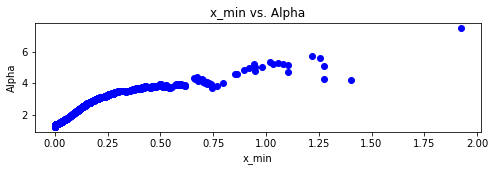

In [12]:
# Calculate x_min and alpha values
x_min_valuesUsdt, alpha_valuesUsdt = calculate_alpha(usdt['realized vol'])

# Set the figure size
plt.figure(figsize=(8, 2))  # Adjust the values as per your preference

# Plot the x_min and alpha values
plt.plot(x_min_valuesUsdt, alpha_valuesUsdt, 'bo')
plt.xlabel('x_min')
plt.ylabel('Alpha')
plt.title('x_min vs. Alpha')

# Adjust the aspect ratio of the plot
plt.gca().set_aspect('auto')

plt.show()

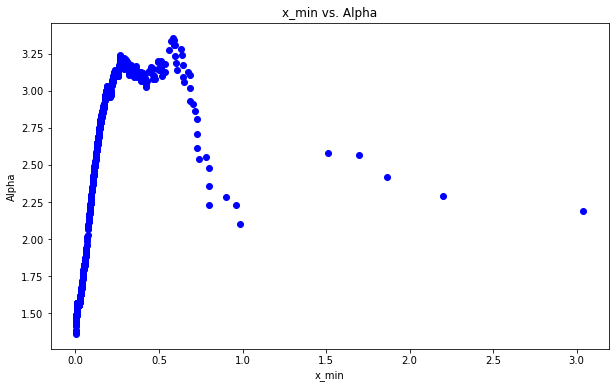

In [7]:
x_min_valuesUsdc, alpha_valuesUsdc = calculate_alpha(usdc2['realized vol'])

# Plot the x_min and alpha values
plt.figure(figsize=(10, 6))
plt.plot(x_min_valuesUsdc, alpha_valuesUsdc, 'bo')
plt.xlabel('x_min')
plt.ylabel('Alpha')
plt.title('x_min vs. Alpha')
plt.gca().set_aspect('auto')
plt.show()


In [ ]:
btc=pd.read_csv('/Users/gadimg/Downloads/BTC-USD.csv')

In [ ]:
btc['Date']=pd.to_datetime(btc['Date'])
btc.set_index('Date', inplace=True)

In [ ]:
btc['realized vol']= np.sqrt(365) * np.sqrt(np.log(btc['High']/btc['Close']) * np.log(btc['High']/btc['Open']) + np.log(btc['Low']/btc['Close']) * np.log(btc['Low']/btc['Open']))

In [ ]:
parameter_range = { ‘alpha’: [2.3, None] }

fit = powerlaw.Fit(data, parameter_range = parameter_range)

In [ ]:
parameter_range = {'alpha':[2.5,3]}
fit = powerlaw.Fit(data,parameter_range = parameter_range)

In [ ]:
 fit.power_law.alpha

In [ ]:
data = usdc2['realized vol']
data = data.to_numpy()
pl = powerlaw.Power_Law(data, xmin=0.26865300918922314, xmax=max(data))
pl.alpha = 3.2133334450737054

synthetic_data = pl.generate_random(len(data))

# Perform the Kolmogorov-Smirnov (KS) goodness-of-fit test
#result = powerlaw.power_law_test(data, synthetic_data)
result = powerlaw.power_law_ks_distance(data, xmin= 0.18201581950541829, alpha=2.999676441053767)
p_value = result.p

# Print or analyze the p-value to determine the goodness of fit
print("p-value:", p_value)

In [ ]:
index = (min(range(len(alpha_valuesUsdc)), key=lambda i: abs(alpha_valuesUsdc[i] - 3.5)))
print(index)

In [ ]:
alpha_valuesUsdc[155]

In [ ]:
x_min_valuesUsdc[37]

In [ ]:
synthetic_data

In [ ]:
resultSynthetic = powerlaw.power_law_ks_distance(synthetic_data, xmin= syntheticFit.xmin, alpha=syntheticFit.alpha)

In [ ]:
syntheticFit=powerlaw.Fit(synthetic_data)

In [ ]:
syntheticFit.xmin

In [ ]:
num_simulations = 1000
ks_statistic_synthetic = []
for _ in range(num_simulations):
    # Generate synthetic data based on the specified alpha and xmin
    synthetic_data = pl.generate_random(len(data))
    
    syntheticFit=powerlaw.Fit(synthetic_data)
    # Calculate the KS statistic for the synthetic data
    ks_statistic = powerlaw.power_law_ks_distance(synthetic_data, xmin= syntheticFit.xmin, alpha=syntheticFit.alpha)
    ks_statistic_synthetic.append(ks_statistic)


In [ ]:
powerlaw.Power_Law.generate_random??

In [ ]:
synthetic_data = pl.generate_random(len(data))

In [ ]:
 syntheticFit=powerlaw.Fit(synthetic_data)
    # Calculate the KS statistic for the synthe

In [ ]:
count=0
for i in range(len(ks_statistic_synthetic)):
    if ks_statistic_synthetic[i]>result:
        count+=1
    else:
        pass

In [ ]:
count

In [ ]:
ksForUsdc=[]
for i in range(len(x_min_valuesUsdc)):
    ks_statistic = powerlaw.power_law_ks_distance(dataUsdc, xmin= x_min_valuesUsdc[i], alpha=alpha_valuesUsdc[i])
    ksForUsdc.append(ks_statistic)

In [ ]:
dataUsdc=usdc2['realized vol'].to_numpy()

In [ ]:
num_simulations = 1000
ks_statistic_synthetic = []
for _ in range(num_simulations):
    # Generate synthetic data based on the specified alpha and xmin
    synthetic_data = pl.generate_random(len(data))
    #fitting synthetic
    x_min_valuesUsdc, alpha_valuesUsdc = calculate_alpha(synthetic_data)
    usdcAlphaXmin = dict(zip(x_min_valuesUsdc, alpha_valuesUsdc))
    
    ksForSynthetic=[]
    for key, value in usdcAlphaXmin.items():
        ks_statistic = powerlaw.power_law_ks_distance(dataUsdc, xmin= key, alpha=value)
        ksForSynthetic.append(min(ks_statistic))
    

    # Append KS statistic for the synthetic data
    
    ks_statistic_synthetic.append(min(ksForSynthetic))


In [ ]:
count=0
for i in range(len(ks_statistic_synthetic)):
    if ks_statistic_synthetic[i]>result:
        count+=1
    else:
        pass

In [ ]:
count

In [ ]:
#combining the alpha and xmin for usdc2 into a dictionary to see if speed improves
usdcAlphaXmin = dict(zip(x_min_valuesUsdc, alpha_valuesUsdc))

In [ ]:
fit=powerlaw.Fit(synthetic_data)

In [ ]:
fit.distribution_compare('power_law', 'lognormal', 'exponential')

In [ ]:
fit=powerlaw.Fit(usdc2['realized vol'])

In [ ]:
fit.xmin

In [ ]:
num_simulations = 1000
ks_statistic_synthetic = []
for _ in range(num_simulations):
    # Generate synthetic data based on the specified alpha and xmin
    synthetic_data = pl.generate_random(len(data))
    #fitting synthetic
    x_min_valuesUsdc, alpha_valuesUsdc = calculate_alpha(synthetic_data)
    usdcAlphaXmin = dict(zip(x_min_valuesUsdc, alpha_valuesUsdc))
    
    ksForSynthetic=[]
    #for key, value in usdcAlphaXmin.items():
     #   ks_statistic = powerlaw.power_law_ks_distance(dataUsdc, xmin= key, alpha=value)
      #  ksForSynthetic.append(ks_statistic)
    #fit=powerlaw.Fit(synthetic_data)
   # ks=fit.power_law.KS()
    ksForSynthetic = [powerlaw.power_law_ks_distance(synthetic_data, xmin= key, alpha=value) for key, value in usdcAlphaXmin.items() ]
    # Append KS statistic for the synthetic data
    
    ks_statistic_synthetic.append(min(ksForSynthetic))


In [ ]:
 ksForSynthetic = [powerlaw.power_law_ks_distance(dataUsdc, xmin= key, alpha=value) for key, value in usdcAlphaXmin.items() ]

In [ ]:
fit=powerlaw.Fit(usdc2['realized vol'])

In [ ]:
fit.distribution_compare('power_law', 'exponential')

In [ ]:
import plpva

In [ ]:
result = plpva.plpva(usdc2['realized vol'], xmin=0.13073649575268584, vec=np.arange(1.50, 3.51, 0.01), reps=1000)